In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

**Step 1**: Importing the dataframes for answering the questions

---

*Question 1:* While selecting the information for answering this question a few choices were made in advance that influence the end result. For example, the assumption was made that a country that used a lot of fossil fuels will probably have a higher output of CO2 per capita. The last step will prove if these two indeed are related to each other and if the usage of fossil fuels can be called one of the biggest predictors of a large CO2 output. Information like the average amount of hours of work per capita per country was not seen as a factor. Maybe it will have its influence, but in advance it was assumed this influence will be small. In short, it was chosen in advance which information would be relevant for the question and which would not. In particular, data has been selected that is known to influence people's ecological footprint, such as the use of fossil fuels or the consumption of meat.

*Question 2:* The only dataframe that was necessary to answer question 2 was the dataframe with the CO2 emissions per capita per country.

*Question 3:* There was a xlsx file available on Our World in Data with  information about seven kinds of fuel and the price per KWh.


**Stap 1**: De dataframes importeren om de vragen te beantwoorden

---

*Vraag 1:* Er zijn bij het selecteren van de informatie al bepaalde keuzes gemaakt die invloed heeft op het eindresultaat. Zo is bijvoorbeeld aangenomen dat een land die veel fossiele brandstoffen verbruikt ook zeer waarschijnlijk een hogere CO2 per hoofd heeft. Tijdens de laatste stap zal blijken of deze twee zaken daadwerkelijk verband met elkaar hebben en of het gebruik van fossiele brandstoffen ook een van de grootste indicatoren kunnen worden genoemd voor een hoge CO2 uitstoot. Het gemiddelde aantal uren aan werktijd per hoofd per land bijvoorbeeld wordt dan weer niet als factor gezien. Het zal mogelijk zijn invloed wel hebben, maar er werd van te voren ingeschat dat dee invloed beperkt zal zijn. Kortom, er is al van te voren gekozen welke informatie relevant was voor de vraagstelling en welke niet. Er is met name data geselecteerd waarvan bekend is dat ze invloed hebben op de ecologische voetafdruk van mensen, zoals aangegeven het gebruik van fossiele brandstoffen of het eten van vlees. 

*Vraag 2:* De enige dataframe die nodig was om de vraag te kunnen worden was de dataframe met de CO2 uitstoot per hoofd per land. 

*Question 3:* Er was een xlsx bestand beschikbaar op Our World in data over zeven soorten brandstoffen met de prijs per KWh. 


In [135]:
#Question 1
co2percapitadata = pd.read_csv("https://raw.githubusercontent.com/DanielleMaas/CO2-emissions/main/CO2%20emissions%20per%20capita.csv", usecols=["Entity", "Year", "Annual CO₂ emissions (per capita)"])
gdpdata = pd.read_csv("https://raw.githubusercontent.com/DanielleMaas/CO2-emissions/main/gdpfile.csv", usecols=["Entity", "Year", "GDP per capita"], parse_dates=['Year']).dropna()
population = pd.read_csv("https://raw.githubusercontent.com/DanielleMaas/CO2-emissions/main/population-and-demography.csv").iloc[:, :3]
meat = pd.read_csv("https://raw.githubusercontent.com/DanielleMaas/CO2-emissions/main/dietary-compositions-by-commodity-group.csv", usecols=["Entity", "Year", "Meat (FAO (2017)) (kilocalories per person per day)"])
dairyandeggs = pd.read_csv("https://raw.githubusercontent.com/DanielleMaas/CO2-emissions/main/dietary-compositions-by-commodity-group.csv", usecols=["Entity", "Year", "Dairy & Eggs (FAO (2017)) (kilocalories per person per day)"])
fossilfuels = pd.read_csv("https://raw.githubusercontent.com/DanielleMaas/CO2-emissions/main/fossil-fuels-per-capita.csv", usecols=["Entity", "Year", "Fossil fuels per capita (kWh)"])

In [136]:
#Question 2
co2percapitadata2 = pd.read_csv("https://raw.githubusercontent.com/DanielleMaas/CO2-emissions/main/CO2%20emissions%20per%20capita.csv", usecols=["Entity", "Year", "Annual CO₂ emissions (per capita)"])

In [137]:
#Question 3
xls = "https://github.com/DanielleMaas/CO2-emissions/raw/main/200605%20IRENADatafileRenewablePowerGenerationCostsin2019v11%20(2).xlsx"
columns = ["Type", 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

solarphotovoltaic = pd.read_excel(xls, "Figure 1.4").tail(5)
solarphotovoltaic = solarphotovoltaic.iloc[3:4, 1: ]
solarphotovoltaic.columns = columns
solarphotovoltaic = solarphotovoltaic.replace()

onshorewind = pd.read_excel(xls, "Figure 1.5").tail(5)
onshorewind = onshorewind.iloc[3:4, 1: ]
onshorewind.columns = columns

offshorewind = pd.read_excel(xls, "Figure 1.6").tail(5)
offshorewind = offshorewind.iloc[3:4, 1:]
offshorewind.columns = columns

csp = pd.read_excel(xls, "Figure 1.7").tail(6)
csp = csp.iloc[3:4, 1: ]
csp.columns = columns

hydropower = pd.read_excel(xls, "Figure 1.8").tail(5)
hydropower = hydropower.iloc[3:4, 1: ]
hydropower.columns = columns

bioenergy = pd.read_excel(xls, "Figure 1.9").tail(5)
bioenergy = bioenergy.iloc[3:4, 1: ]
bioenergy.columns = columns

geothermal = pd.read_excel(xls, "Figure 1.10").tail(5)
geothermal = geothermal.iloc[3:4, 1: ]
geothermal.columns = columns

**Step 2**: Cleaning and/or enriching the dataframes with new data

---

*Question 1:* In order to create a complete final dataframe from all the separate dataframes it was necessary to delete the information from before 1965 from all dataframes. All of them contained 1965 and on and that made it possible to compare the data with each other. 

*Question 3:* The dataframe geothermal was missing one value. The information from the nearest value is used to fill in the missing value. Since the values in this dataframe are not far apart, it would not change the end result of the analysis too much and give a reliable outcome. 



**Stap 2**: De dataframes opschonen en/of verrijken met nieuwe informatie

---


*Vraag 1*: Om een compleet dataframe te kunnen maken van alle losse dataframes, was het nodig om de informatie van voor 1965 uit een aantal dataframes te halen. Dit omdat  alle ingelezen dataframes 1965 bevatte als jaar en dat maakte het mogelijk om de data met elkaar te vergelijken. 

*Vraag 3*: De dataframe geothermal miste een waarde. De dichtsbijzijnde volgende waarde is gebruikt om de missende waarde in te kunnen vullen. De waardes in dit dataframe liggen niet ver uit elkaar, waardoor het eindresultaat van de analyse niet te veel verandert en nog steeds zorgt voor een betrouwbaar resultaat. 

In [138]:
co2percapitadata = co2percapitadata.loc[co2percapitadata['Year'] >= 1965]
gdpdata['Year'] = gdpdata['Year'].astype(int)
gdpdata = gdpdata.loc[gdpdata['Year'] >= 1965]
population = population.loc[population['Year'] >= 1965]
meat = meat.loc[meat['Year'] >= 1965]
dairyandeggs = dairyandeggs.loc[dairyandeggs['Year'] >= 1965]
fossilfuels = fossilfuels.loc[fossilfuels['Year'] >= 1965]

def columnrename(dataframe):
  dataframe = dataframe.rename(columns={'Entity': 'Country', 'Country name': 'Country'}).reset_index(drop=True)
  return dataframe

co2percapitadata = columnrename(co2percapitadata)
gdpdata = columnrename(gdpdata)
population = columnrename(population)
meat = columnrename(meat)
dairyandeggs = columnrename(dairyandeggs)
fossilfuels = columnrename(fossilfuels)

finaldf = pd.merge(co2percapitadata, gdpdata, on=["Country", "Year"])
finaldf = pd.merge(finaldf, population, on=["Country", "Year"])
finaldf = pd.merge(finaldf, meat, on=["Country", "Year"])
finaldf = pd.merge(finaldf, dairyandeggs, on=["Country", "Year"])
finaldf = pd.merge(finaldf, fossilfuels, on=["Country", "Year"])

In [139]:
geothermal = geothermal.ffill(axis = 1)

# Question 1: What is the biggest predictor of a large CO2 output per capita of a country?

This question will be answered by looking at the largest correlation between a dataframe containing the CO2 emissions per country per year and various other dataframes. Even though a correlation might not mean that one value directly influences another, it does give a good indication which factors may contribute to a large CO2 output. 

# Vraag 1: Wat is de grootste indicator van een hoge C02 uitstoot per hoofd? 

Deze vraag zal beantwoord worden door na de correlatie te kijken tussen de dataframe die de C02 uitstoot per hoofd per jaar bevat en verschillende andere dataframes. Ook al betekent een correlatie niet direct dat een bepaalde waarde direct invloed heeft op een andere waarde, geeft het wel een goede indicatie welke factoren bijdragen aan een hoge CO2 uitstoot. 

In [140]:
co2 = finaldf.loc[:, "Annual CO₂ emissions (per capita)"]
finaldf["corrco2"] = finaldf.loc[: , "Annual CO₂ emissions (per capita)"].corr(co2)
finaldf["GDP"] = finaldf.loc[: , "GDP per capita"].corr(co2)
finaldf["Size of Population"] = finaldf.loc[: , "Population"].corr(co2)
finaldf["Meat"] = finaldf.loc[: , "Meat (FAO (2017)) (kilocalories per person per day)"].corr(co2)
finaldf["Dairy and eggs"] = finaldf.loc[: , "Dairy & Eggs (FAO (2017)) (kilocalories per person per day)"].corr(co2)
finaldf["Fossil fuels"] = finaldf.loc[: , "Fossil fuels per capita (kWh)"].corr(co2)
finaldf = finaldf.iloc[1:2 , 8:]

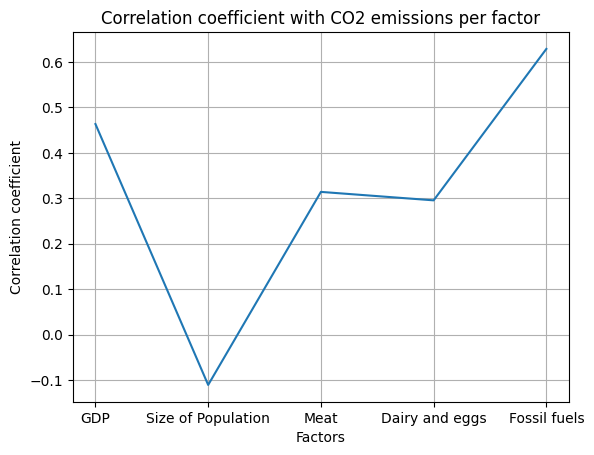

In [142]:
fig, ax = plt.subplots()

correlations = finaldf.columns[1:]
for index, row in finaldf.iterrows():
  plt.plot(correlations, row[1:], label=row[0])

plt.title("Correlation coefficient with CO2 emissions per factor")
plt.xlabel("Factors")
plt.ylabel("Correlation coefficient")
plt.grid()

plt.show()

# Answer to question 1: 
The following possible contributing factors were taken into account:
- The GDP of a country
- The size of the population
- The amount of meat that is consumed in a country
- The amount of dairy and eggs that is consumed in a country
- De amount of fossil fuels that is consumed in a country

The size of the population seems to have very little to do with the CO2 emissions of a country and the calculation shows a value of -0,11. The GDP and the amount of fossil fuels a country uses have the most effect, they respectively have a value of 0,463 and 0,628. 

# Antwoord op vraag 1: 
De volgende factoren die mogelijk van invloed zijn op de CO2 uitstoot zijn meegenomen: 
- Het nationaal bruto product van een land
- De grootte van de bevolking
- De hoeveelheid vlees dat er in een land gegeten wordt
- De hoeveel melk en eieren dat gegeten wordt
- De hoeveel fossiele brandstoffen dat een land gebruikt

De grootte van de bevolking lijkt weinig te maken te hebben met de CO2 uitstoot van een land en de berekening laat ook een waarde van -0,11 zien. Het meest effect heeft het nationaal bruto product (waarde van 0,463) en de hoeveelheid fossiele brandstoffen dat een land gebruikt (0,628).

#Question 2: Which countries are making the biggest strides in decreasing CO2 output?

In order to be able to measure which countries are improving, you need a starting point. Ideally this is the point where Co2 emissions were at its highest, so that you can measure which countries decreased their output the most. The following was done to find a starting point:  

* In the dataframe the CO2 emissions worldwide were summed up per year
* The function nlargest was applied to find the year were the co2 emissions were at its highest globally (that was in 1991) 

The end point was 2021, the last point in the dataframe. 



# Vraag 2: Welke landen maken de grootste vooruitgang in het verminderen van de CO2 uitstoot? 

Om te kunnen meten welke landen zich aan het verbeteren zijn, heb je een startpunt nodig om te meten. Bij voorkeur is dat het punt waarop de CO2 uitstoot wereldwijd op z'n hoogst was, zodat je kunt meten welke landen sindsdien hun uitstoot het meest hebben vermindert. Het volgende is gedaan om een startpunt te vinden: 


*   In het dataframe is de CO2 uitstoot van elk land per jaar opgeteld
*   De functie nlargest was toegepast om het jaar te vinden waar de CO2 uitstoot op z'n hoogst was en dat was in 1991.

Het laatste meetpunt in de dataframe was 2021. 



In [143]:
grouped = co2percapitadata2.groupby(["Year"])
sumofco2 = grouped["Annual CO₂ emissions (per capita)"].sum()
sumofco2.nlargest(1)

co2percapitadata2["Annual CO₂ emissions (per capita)"] = co2percapitadata["Annual CO₂ emissions (per capita)"].astype(float)
dataof1991 = co2percapitadata2.loc[co2percapitadata2['Year'] == 1991]
dataof2021 = co2percapitadata2.loc[co2percapitadata2['Year'] == 2021]

merged = pd.merge(dataof1991, dataof2021, on=["Entity"])

emissionsof1991 = merged.loc[: , ["Annual CO₂ emissions (per capita)_x"]]
emissionsof2021 = merged.loc[: , ["Annual CO₂ emissions (per capita)_y"]]
merged["Difference"] = merged["Annual CO₂ emissions (per capita)_y"] - merged["Annual CO₂ emissions (per capita)_x"]
merged = merged.sort_values("Difference")
topfive = merged.head(5)


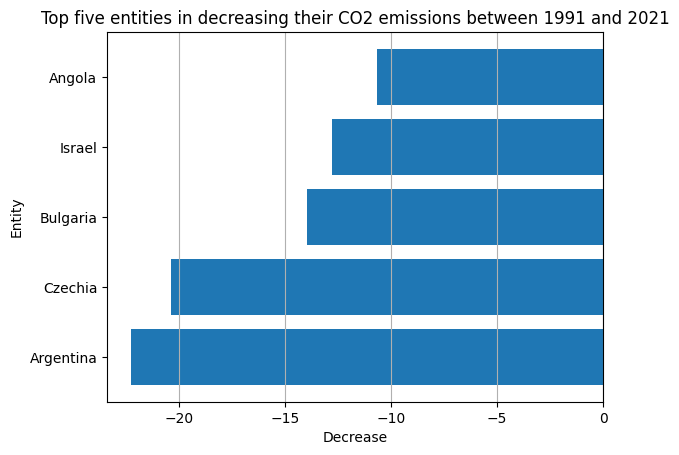

In [144]:
fig, ax = plt.subplots()

Entity = topfive.loc[:, "Entity"]
difference= topfive.loc[:,"Difference"]
ax.barh(Entity, difference)
plt.xlabel("Decrease")
plt.ylabel("Entity")
ax.grid(True, axis="x") 
plt.title("Top five entities in decreasing their CO2 emissions between 1991 and 2021")
plt.show()



# Answer to question 2: 
The figure shows that the following countries made the biggest strides between 1991 and 2021: 

* Angola
*   Israel
*   Bulgaria
*   Czechia
*   Argentina



# Antwoord op vraag 2:
De grafiek laat zien dat de volgende landen de grootste stappen hebben gemaakt tussen 1991 en 2021:



*   Angola
*   Israel
*   Bulgarije
*   Tsjechië
*   Argentinië







#Question 3: Which non-fossil fuel energy technology will have the best price in the future?

This question is answered by defining a function and applying to every non fossil fuel in the xlsx file. The function makes a prediction based on the already known data using linear regression. 

# Vraag 3: Welke niet fossiele brandstof zal de beste prijs hebben in de toekomst? 

Deze vraag is beantwoord door een functie te definiëren en dit toe te passen op elke niet fossiele brandstof in het xlsx bestand. De functie maakt op basis van de al bekende gegevens met behulp van lineaire regressie een voorspelling. 

In [145]:
def prediction(dataframe):
  dataframe = dataframe.iloc[: , 1: ]
  x = dataframe.columns.values.reshape(-1, 1)
  y = dataframe.iloc[:].values.reshape(-1, 1)
  linear_regressor = LinearRegression()
  linear_regressor.fit(x, y)
  predictionx = [[2050]]
  predictiony = linear_regressor.predict(predictionx)
  return predictiony

solarphotovoltaicpredict = prediction(solarphotovoltaic)
onshorewindpredict = prediction(onshorewind)
offshorewindpredict = prediction(offshorewind)
csppredict = prediction(csp)
hydropowerpredict = prediction(hydropower)
bioenergypredict = prediction(bioenergy)
geothermalpredict = prediction(geothermal)

cost = [solarphotovoltaicpredict, onshorewindpredict, offshorewindpredict, csppredict, hydropowerpredict, bioenergypredict, geothermalpredict]
sort = ["Solar Photovoltaic", "Onshore wind", "Offshore wind", "CSP", "Hydropower", "Bioenergy", "Geothermal"]

predictions = pd.DataFrame({'sort':sort, 'cost': cost})
predictions

,sort,cost
0,Solar Photovoltaic,[[-0.9296387878787868]]
1,Onshore wind,[[-0.061824242424242115]]
2,Offshore wind,[[-0.055327272727272]]
3,CSP,[[-0.3844121212121223]]
4,Hydropower,[[0.10021354729678666]]
5,Bioenergy,[[0.056511178012087826]]
6,Geothermal,[[0.13903181340231097]]


In [146]:
#For the purpose of making the graph below readable, some of the types of energies were renamed.
#Met het doel om de grafiek hieronder leesbaar te maken zijn een aantal energiesoorten afgekort. 
predictions = predictions.replace("Solar Photovoltaic", "SP")
predictions = predictions.replace("Onshore wind", "OnW")
predictions = predictions.replace("Offshore wind", "OffW")
predictions = predictions.replace("Hydropower", "HP")
predictions = predictions.replace("Bioenergy", "Bio")
predictions = predictions.replace("Geothermal", "Geo")

/usr/local/lib/python3.10/dist-packages/pandas/core/missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


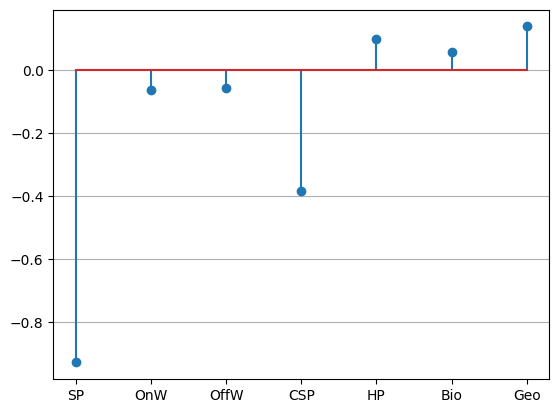

In [147]:
fig, ax = plt.subplots()
x = predictions.loc[:, "sort"]
y = predictions.loc[:, "cost"]
ax.stem(x, y)
ax.grid(True, axis="y") 
plt.show()

# Answer to question 3: 
The predictions show that Solar Photovoltaic will be the cheapest in the future: -0,93 US dollars per kWh. Geothermal is going to be the most expensive: 0.139 US dollar per kWh. 

# Antwoord op vraag 3:
De voorspellingen laten zien dat fotovoltaïsche zonne-energie het goedkoopste zal zijn in de toekomst: -0,93 Amerikaanse dollars per kilowattuur. Geothermische energie zal het duurste zijn: 0,139 Amerikaanse dollars per kilowattuur. 